# Spot check the FFI counts orientation from TPFs

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.console import ProgressBar
import logging
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import astropy.visualization
from fast_histogram import histogram1d

In [4]:
df = pd.read_csv('../../k2-target-index/k2-target-pixel-files.csv.gz')

In [5]:
! ls /Volumes/Truro/ffi/ |tail

ktwo2017203170143-c14_ffi-cal.fits
ktwo2017203170143-c14_ffi-orig.fits
ktwo2017203170143-c14_ffi-uncert.fits
wcs-ktwo2014070234206-c00_ffi-cal.fits
wcs-ktwo2014074233223-c00_ffi-cal.fits
wcs-ktwo2014110010101-c00_ffi-cal.fits
wcs-ktwo2014157010055-c01_ffi-cal.fits
wcs-ktwo2014203150825-c01_ffi-cal.fits
wcs-ktwo2014240042843-c02_ffi-cal.fits
wcs-ktwo2014294030900-c02_ffi-cal.fits


In [96]:
hdu_ffi = fits.open('/Volumes/Truro/ffi/ktwo2016014203204-c08_ffi-cal.fits')
campaign = 8
#hdu_counts = fits.open('/Volumes/burlingame/FFI_counts/C{}_FFI_mask.fits'.format(str(campaign)))
hdu_counts = fits.open('../data/FFI_counts/C8_FFI_mask.fits')

In [97]:
len(hdu_counts)

85

In [98]:
for i in np.arange(1, 85):
    print(hdu_counts[i].data.sum(), end = ' ')

28660.0 28958.0 32178.0 31338.0 0.0 0.0 0.0 0.0 29543.0 30337.0 28420.0 33401.0 28604.0 23343.0 30113.0 32125.0 0.0 0.0 0.0 0.0 15632.0 18083.0 25034.0 19189.0 29283.0 19618.0 31428.0 32208.0 32541.0 23016.0 27464.0 27549.0 37267.0 40376.0 49175.0 32681.0 16546.0 17982.0 20411.0 25357.0 24320.0 145258.0 19590.0 22093.0 21403.0 18693.0 20908.0 21051.0 40473.0 26485.0 30912.0 32138.0 36515.0 37683.0 36172.0 36842.0 27486.0 39078.0 33488.0 34388.0 20367.0 14433.0 25945.0 24148.0 25191.0 19163.0 38945.0 30035.0 26776.0 28608.0 36915.0 28843.0 33648.0 34101.0 30796.0 32512.0 26454.0 23497.0 34222.0 33227.0 32241.0 39490.0 32105.0 30832.0 

In [99]:
#df[df.url.str.contains('ktwo202086810-c00_lpd-targ.fits.gz')].T

In [131]:
mod_out = 'MOD.OUT 9.1'
counts = hdu_counts[mod_out].data
data_raw = hdu_ffi[mod_out].data

In [132]:
np.min(data_raw)

-380.75293

In [133]:
delta = -1.0*np.min(data_raw) + 100

In [134]:
data = data_raw + delta

In [135]:
logdat = np.log10(data)

In [136]:
minmax = astropy.visualization.MinMaxInterval()

vmin, vmax = minmax.get_limits(logdat)

x = np.linspace(vmin, vmax, 200)
y = histogram1d(logdat.reshape(-1), bins=200, range=(vmin, vmax))

In [137]:
good_interval = astropy.visualization.AsymmetricPercentileInterval(10, 95.0)
vmin, vmax = good_interval.get_limits(logdat)

In [138]:
norm = astropy.visualization.ImageNormalize(vmin=10**vmin, vmax=10**vmax)

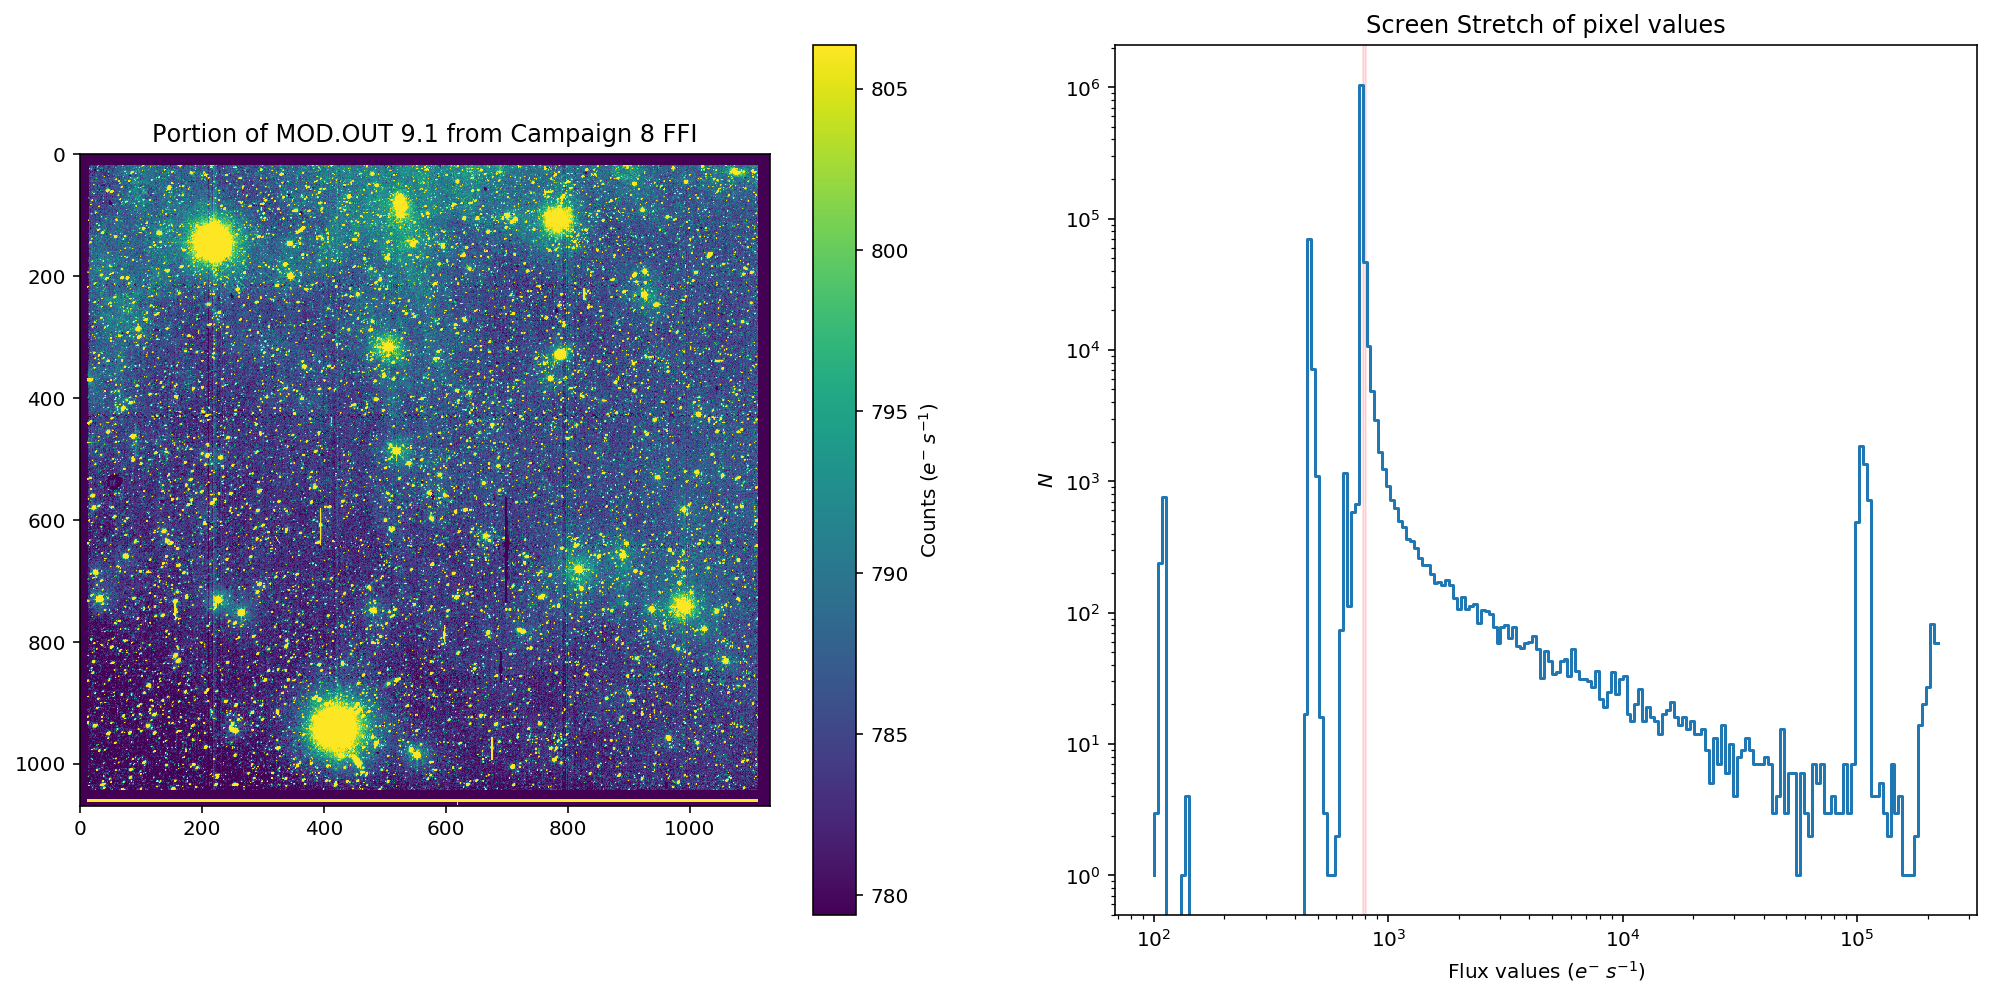

In [139]:
plt.figure(figsize=(17,8))

plt.subplot(121)
plt.imshow(data, norm=norm)
plt.title('Portion of {} from Campaign {} FFI'.format(mod_out, str(campaign)))
cbar = plt.colorbar()
cbar.set_label('Counts ($e^{-} \; s^{-1}$)')

plt.subplot(122)
plt.step(10**x, y)
plt.axvspan(10**vmin, 10**vmax, alpha=0.1, color='r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Flux values ($e^{-} \; s^{-1}$)')
plt.ylabel('$N$')
plt.title('Screen Stretch of pixel values');

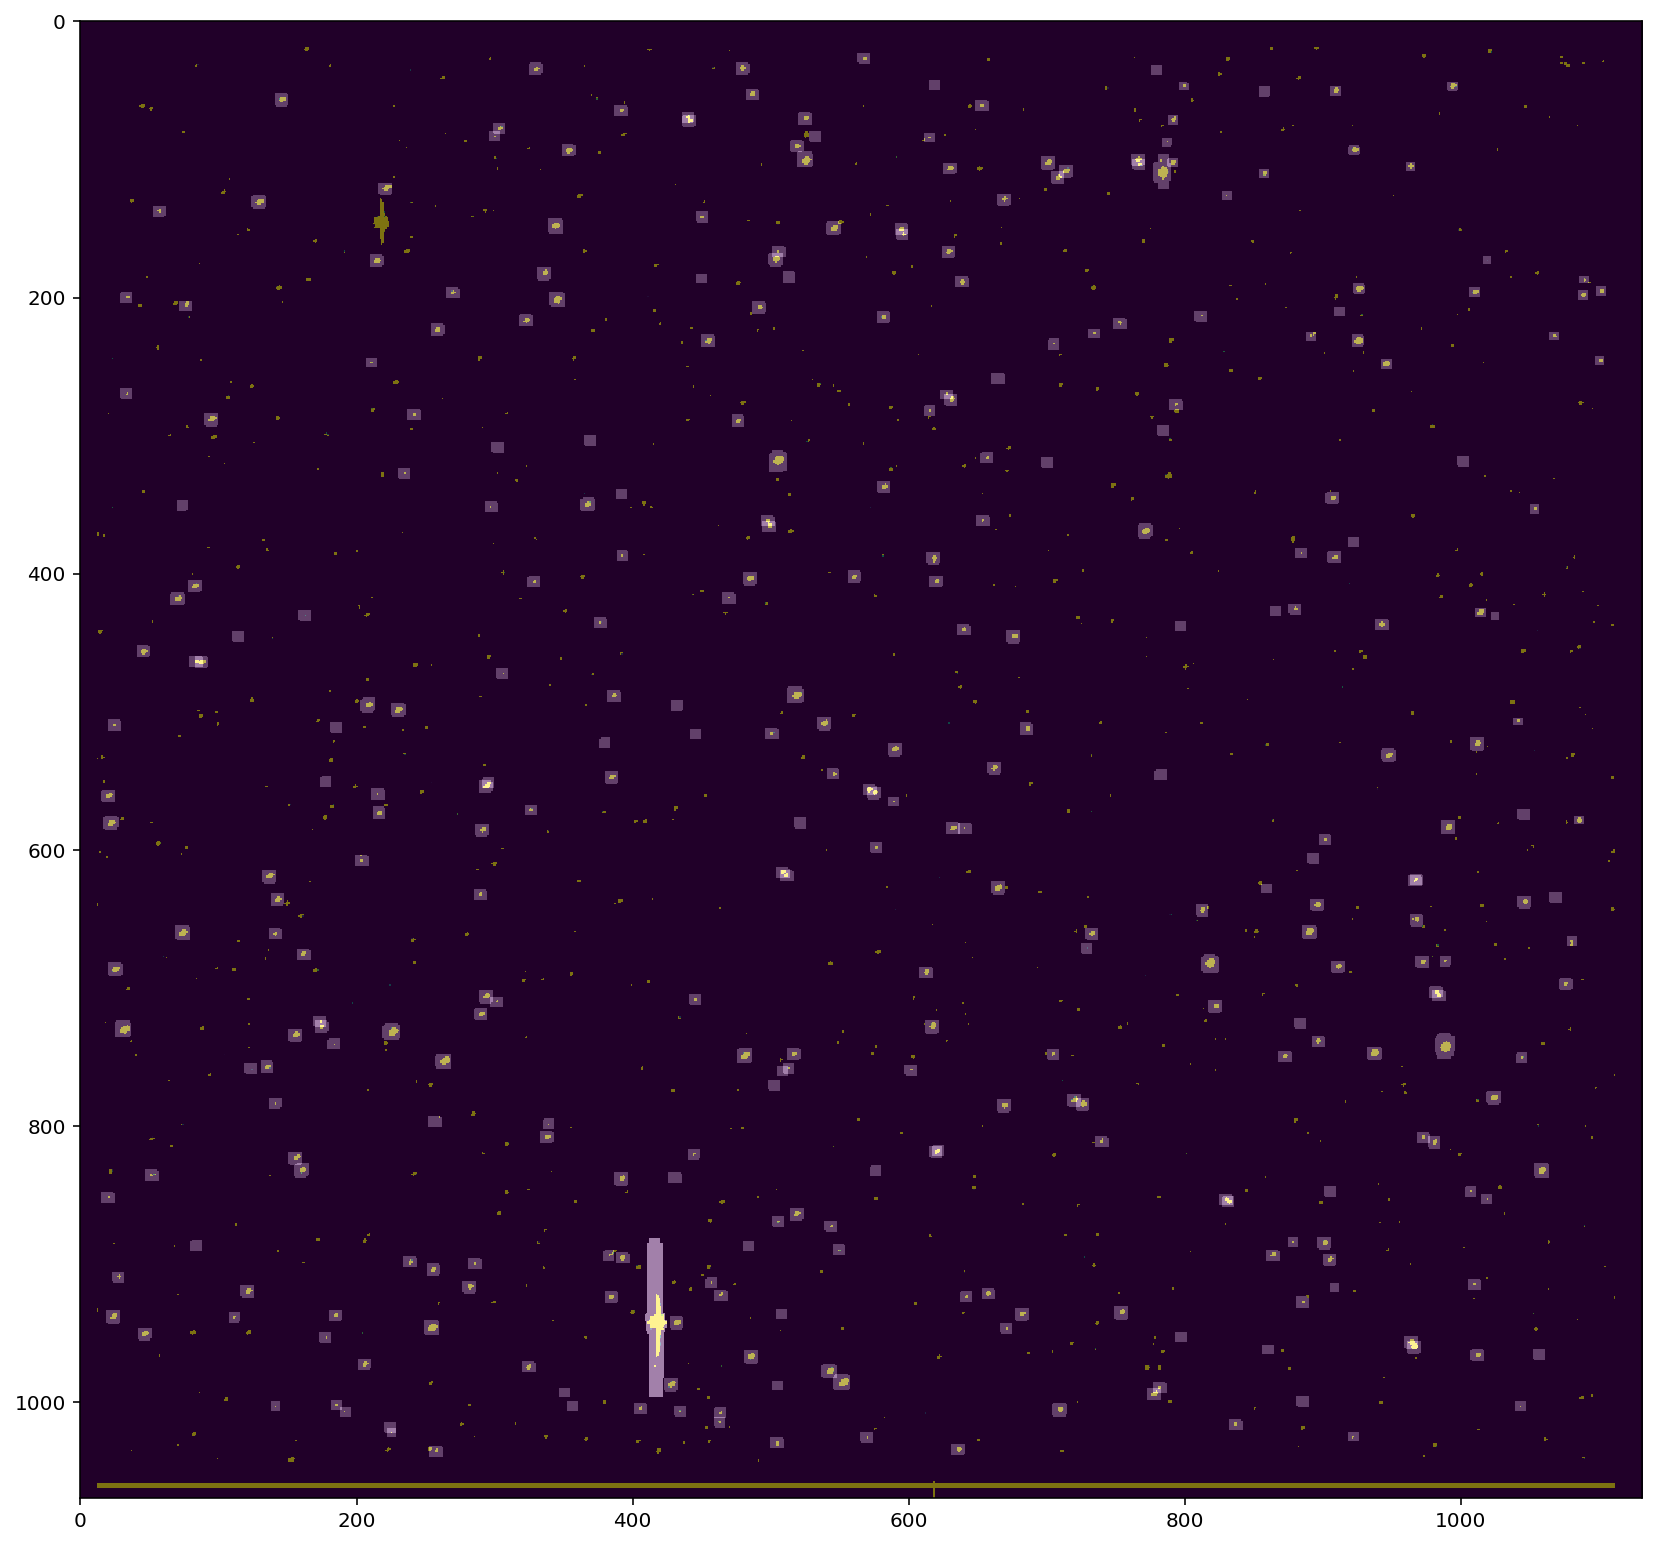

In [140]:
plt.figure(figsize=(14,14))
plt.imshow(hdu_counts[mod_out].data, interpolation='none', cmap='binary_r');
plt.imshow(hdu_ffi[mod_out].data, alpha=0.5, interpolation='none', cmap='viridis', norm=norm);

First, let's spotcheck if the alignment is correct!

In [110]:
df['mod_str'] = "MOD.OUT "+df.module.astype(str)+'.'+df.output.astype(str)

In [111]:
gi = (df.campaign == campaign) & (df.mod_str == mod_out)

In [112]:
df = df.reset_index(drop=True)

In [113]:
local_dir = '/Volumes/burlingame/TPFs/c{}/'.format(campaign)
mod_out_tpfs = df.url[gi].str[59:].values

In [114]:
len(mod_out_tpfs)

274

In [115]:
ii = 20

In [116]:
#df.npix[gi]

In [117]:
df.npix[gi].sort_values().tail(15)

307846    119
307912    119
306577    119
306877    128
307290    128
307126    128
306243    128
307691    129
306576    129
307052    140
306606    140
307762    140
307339    158
307513    174
306670    281
Name: npix, dtype: int64

In [91]:
local_dir+tpf_path

'/Volumes/burlingame/TPFs/c1/202000000/93000/ktwo202093825-c00_lpd-targ.fits.gz'

In [118]:
df.url.loc[307513]

'http://archive.stsci.edu/missions/k2/target_pixel_files/c8/220600000/86000/ktwo220686714-c08_lpd-targ.fits.gz'

In [119]:
! wget http://archive.stsci.edu/missions/k2/target_pixel_files/c8/220600000/86000/ktwo220686714-c08_lpd-targ.fits.gz

--2017-12-15 12:47:47--  http://archive.stsci.edu/missions/k2/target_pixel_files/c8/220600000/86000/ktwo220686714-c08_lpd-targ.fits.gz
Resolving archive.stsci.edu... 130.167.252.39
Connecting to archive.stsci.edu|130.167.252.39|:80... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Date: Fri, 15 Dec 2017 20:47:47 GMT
  Server: Apache
  Set-Cookie: Apache=143.232.237.12.1513370867999620; path=/
  Last-Modified: Sat, 02 Jul 2016 00:44:55 GMT
  ETag: "71f07dbd-a78b48-5369c696b6fc0"
  Accept-Ranges: bytes
  Content-Length: 10980168
  X-Frame-Options: SAMEORIGIN
  Keep-Alive: timeout=5, max=100
  Connection: Keep-Alive
  Content-Type: application/x-gzip
Length: 10980168 (10M) [application/x-gzip]
Saving to: ‘ktwo220686714-c08_lpd-targ.fits.gz’

ktwo220686714-c08_l 100%[===================>]  10.47M  1.77MB/s    in 6.7s    

2017-12-15 12:47:54 (1.57 MB/s) - ‘ktwo220686714-c08_lpd-targ.fits.gz’ saved [10980168/10980168]



In [120]:
#tpf_path = mod_out_tpfs[ii]
tpf_path = df.url.loc[166970][59:]
#hdu_tpf = fits.open(local_dir+tpf_path)
hdu_tpf = fits.open('./ktwo220686714-c08_lpd-targ.fits.gz')

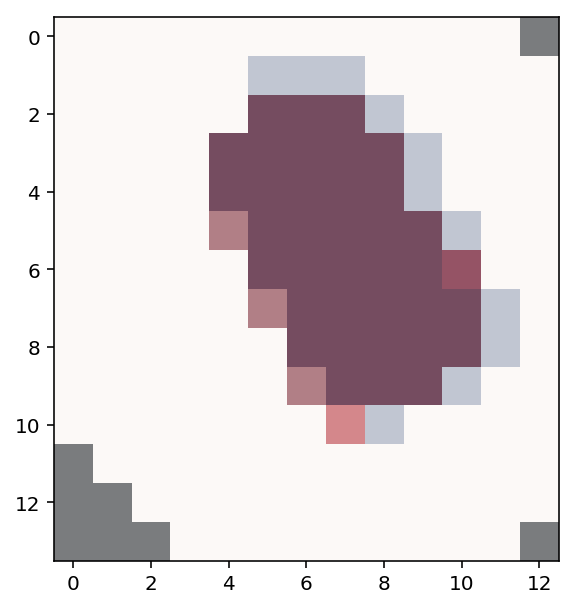

In [130]:
plt.figure(figsize=(5,5))
hdr = hdu_tpf['TARGETTABLES'].header
cx, cy = hdr['1CRV4P'], hdr['2CRV4P']
sy, sx = hdu_tpf['APERTURE'].shape

plt.imshow(hdu_counts[mod_out].data[cy:cy+sy, cx:cx+sx], interpolation='none', cmap='binary_r');
#plt.imshow(hdu_counts[mod_out].data, interpolation='none', cmap='binary_r');
plt.imshow(hdu_ffi[mod_out].data[cy:cy+sy, cx:cx+sx], alpha=0.5, interpolation='none', cmap='Blues', norm=norm);
plt.imshow(hdu_tpf['TARGETTABLES'].data['FLUX'][1008, :, :], alpha=0.5, interpolation='none', cmap='Reds', norm=norm);

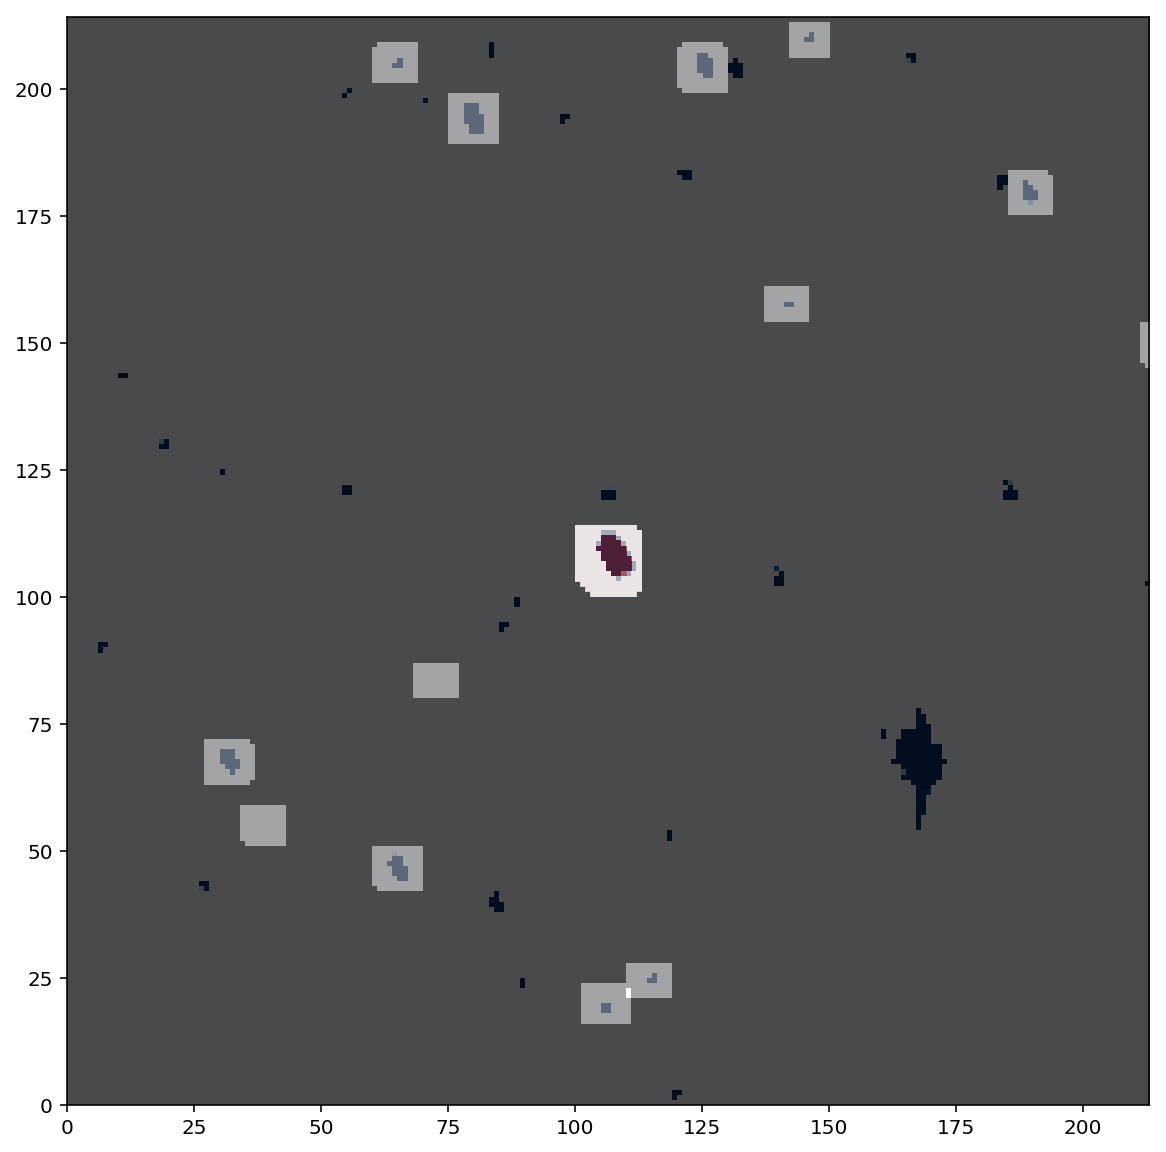

In [123]:
plt.figure(figsize=(10,10))
hdr = hdu_tpf['TARGETTABLES'].header
cx, cy = hdr['1CRV4P'], hdr['2CRV4P']
sy, sx = hdu_tpf['APERTURE'].shape

dx = 100
dy=100
plt.imshow(hdu_counts[mod_out].data[cy-dx:cy+sy+dx, cx-dx:cx+sx+dx], interpolation='none', cmap='binary_r', extent=[0, 200+sx, 0, 200+sy]);
#plt.imshow(hdu_counts[mod_out].data, interpolation='none', cmap='binary_r');

extent = [dx,dx+sx, dy, dy+sy]
plt.imshow(hdu_tpf['TARGETTABLES'].data['FLUX'][0, :, :], alpha=0.8, extent=extent, interpolation='none', cmap='Reds', norm=norm);
plt.imshow(hdu_ffi[mod_out].data[cy-dx:cy+sy+dx, cx-dx:cx+sx+dx], alpha=0.3, interpolation='none', cmap='Blues', norm=norm, extent=[0, 200+sx, 0, 200+sy]);

Looks good!

The end